In [1]:
# import the necessart dependencies
import pandas as pd
import numpy as np

In [2]:
# load the dataset
df = pd.read_csv('../data/raw/Fraud_Data.csv')

Checking the data out

In [4]:
df.head() # check the top 5 data in the dataset

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [7]:
df.info() # check the basic information about the dataset such as datatypes and non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


In [8]:
df.describe() # Statistical summery of the dataset

,user_id,purchase_value,age,ip_address,class
count,151112.000000,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,200171.040970,36.935372,33.140704,2.152145e+09,0.093646
std,115369.285024,18.322762,8.617733,1.248497e+09,0.291336
min,2.000000,9.000000,18.000000,5.209350e+04,0.000000
25%,100642.500000,22.000000,27.000000,1.085934e+09,0.000000
50%,199958.000000,35.000000,33.000000,2.154770e+09,0.000000
75%,300054.000000,49.000000,39.000000,3.243258e+09,0.000000
max,400000.000000,154.000000,76.000000,4.294850e+09,1.000000


Data Cleaning

In [ ]:
# handling missing values
df.isnull().sum() # there are no missing values in the dataset


user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64

In [11]:
# Remove Duplicate values
df.duplicated().sum()  # the data has no duplicate values


np.int64(0)

In [14]:
# Correct datatypes
df.dtypes

user_id             int64
signup_time        object
purchase_time      object
purchase_value      int64
device_id          object
source             object
browser            object
sex                object
age                 int64
ip_address        float64
class               int64
dtype: object

In [15]:
# convert times to datetime
df["signup_time"] = pd.to_datetime(df["signup_time"])
df["purchase_time"] = pd.to_datetime(df["purchase_time"])

In [17]:
# convert strings to categories
for col in ["source", "browser", "sex"]:
    df[col] = df[col].astype('category')

In [18]:
# verifying data changes to appropriate datatypes
df.dtypes

user_id                    int64
signup_time       datetime64[ns]
purchase_time     datetime64[ns]
purchase_value             int64
device_id                 object
source                  category
browser                 category
sex                     category
age                        int64
ip_address                 int64
class                      int64
dtype: object

Exploratory Data Analysis

In [20]:
# Univariate analysis: distribution of key variables
import matplotlib.pyplot as plt
import seaborn as sns

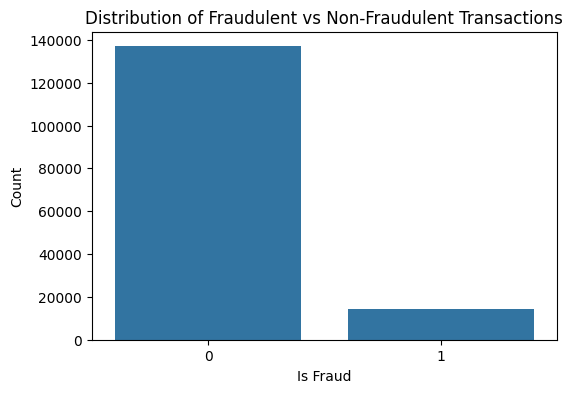

In [21]:
# class: The target variable where 1 indicates a fraudulent transaction and 0 indicates a non-fraudulent transaction.
# Distribution of the target variable 'class'
plt.figure(figsize=(6,4))
sns.countplot(x='class', data=df)
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()

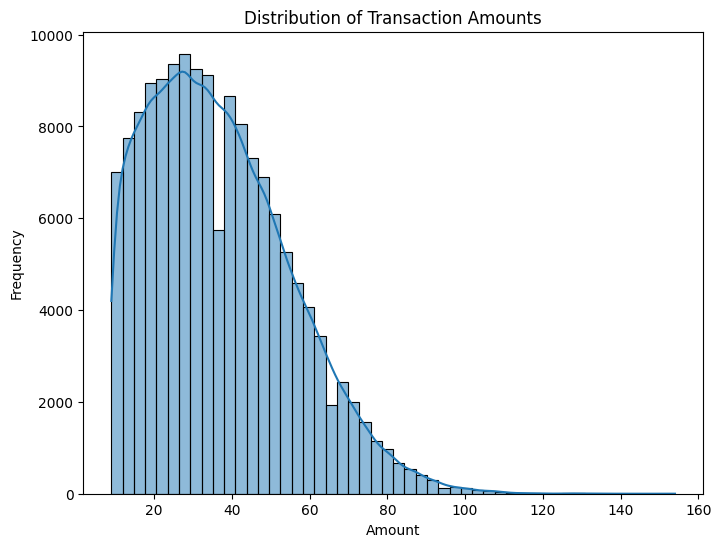

In [23]:
# Distribution of 'purchase_value' variable
plt.figure(figsize=(8,6))
sns.histplot(df['purchase_value'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()


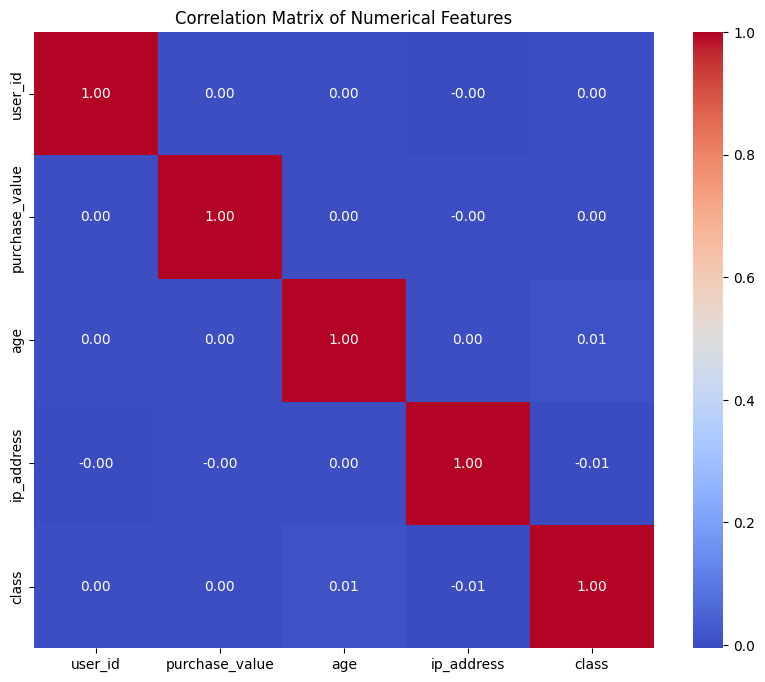

In [25]:
# Bivariate analysis
# Correlation matrix to see relationships between numerical variables
plt.figure(figsize=(10,8))
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

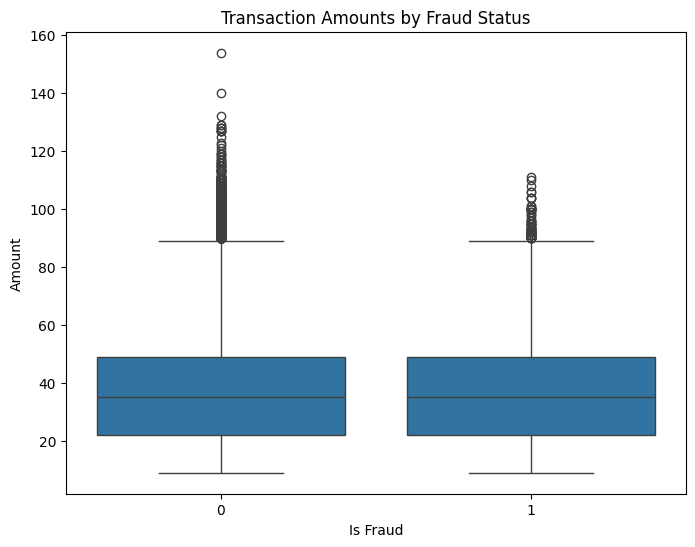

In [26]:
# relationship between 'purchase_value' and 'is_fraud'
plt.figure(figsize=(8,6))
sns.boxplot(x='class', y='purchase_value', data=df)
plt.title('Transaction Amounts by Fraud Status')
plt.xlabel('Is Fraud')
plt.ylabel('Amount')
plt.show()

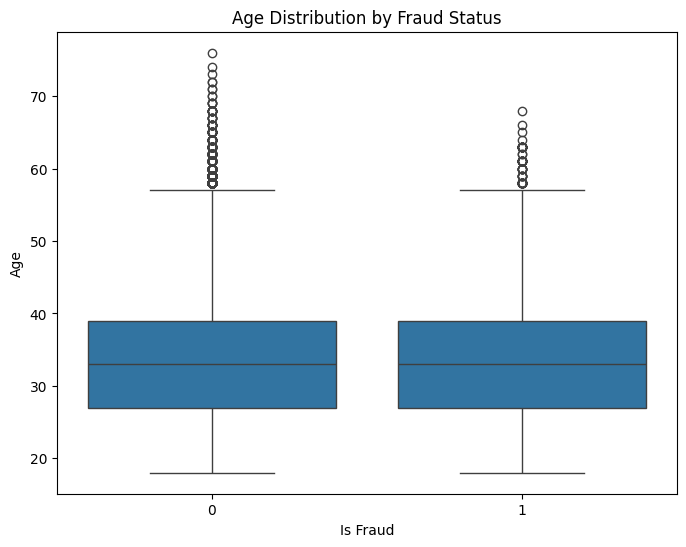

In [27]:
# relationship between age and 'is_fraud
plt.figure(figsize=(8,6))
sns.boxplot(x='class', y='age', data=df)
plt.title('Age Distribution by Fraud Status')
plt.xlabel('Is Fraud')
plt.ylabel('Age')
plt.show()

Class Distribution:
 class
0    136961
1     14151
Name: count, dtype: int64


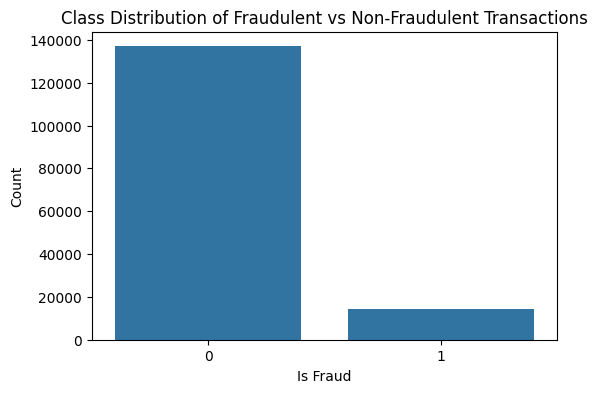

In [ ]:
# Class distribution analysis: quantify the imbalance between fraudulent and non-fraudulent transactions
fraud_counts = df['class'].value_counts()
print("Class Distribution:\n", fraud_counts)
plt.figure(figsize=(6,4))
sns.barplot(x=fraud_counts.index, y=fraud_counts.values)
plt.title('Class Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()